In [12]:
from quantopian.pipeline import Pipeline
from quantopian.research import run_pipeline
from quantopian.pipeline.filters.morningstar import Q1500US
from quantopian.pipeline.data.sentdex import sentiment
from quantopian.pipeline.data.morningstar import operation_ratios

def make_pipeline():
    testing_factor = operation_ratios.operation_margin.latest
    universe = (Q1500US() & testing_factor.notnull())
    
    testing_factor = testing_factor.rank(mask = universe, method = 'average')
    pipe = Pipeline(columns = {'testing_factor':testing_factor},
                    screen = universe)
    
    return pipe

result = run_pipeline(make_pipeline(), start_date = '2015-01-01', end_date = '2016-01-01')
result.head()

testing_factor
2015-01-02 00:00:00+00:00 Equity(2 [HWM])             431.0
                          Equity(24 [AAPL])          1184.0
                          Equity(41 [ARCB])           298.0
                          Equity(62 [ABT])            788.0
                          Equity(67 [ADSK])           223.0

In [13]:
assets = result.index.levels[1].unique()
pricing = get_pricing(assets, start_date = '2014-12-01', end_date = '2016-02-01', fields = 'open_price')
len(assets)

9657

Dropped 5.0% entries from factor data: 5.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,1.0,751.0,372.192914,214.316492,178375,50.018086
2,734.0,1494.0,1113.825679,213.847793,178246,49.981914


Returns Analysis


,3D,10D,30D
Ann. alpha,0.064,0.061,0.050
beta,-0.186,-0.184,-0.207
Mean Period Wise Return Top Quantile (bps),6.802,6.093,6.275
Mean Period Wise Return Bottom Quantile (bps),-6.797,-6.097,-6.307
Mean Period Wise Spread (bps),13.598,12.190,12.583


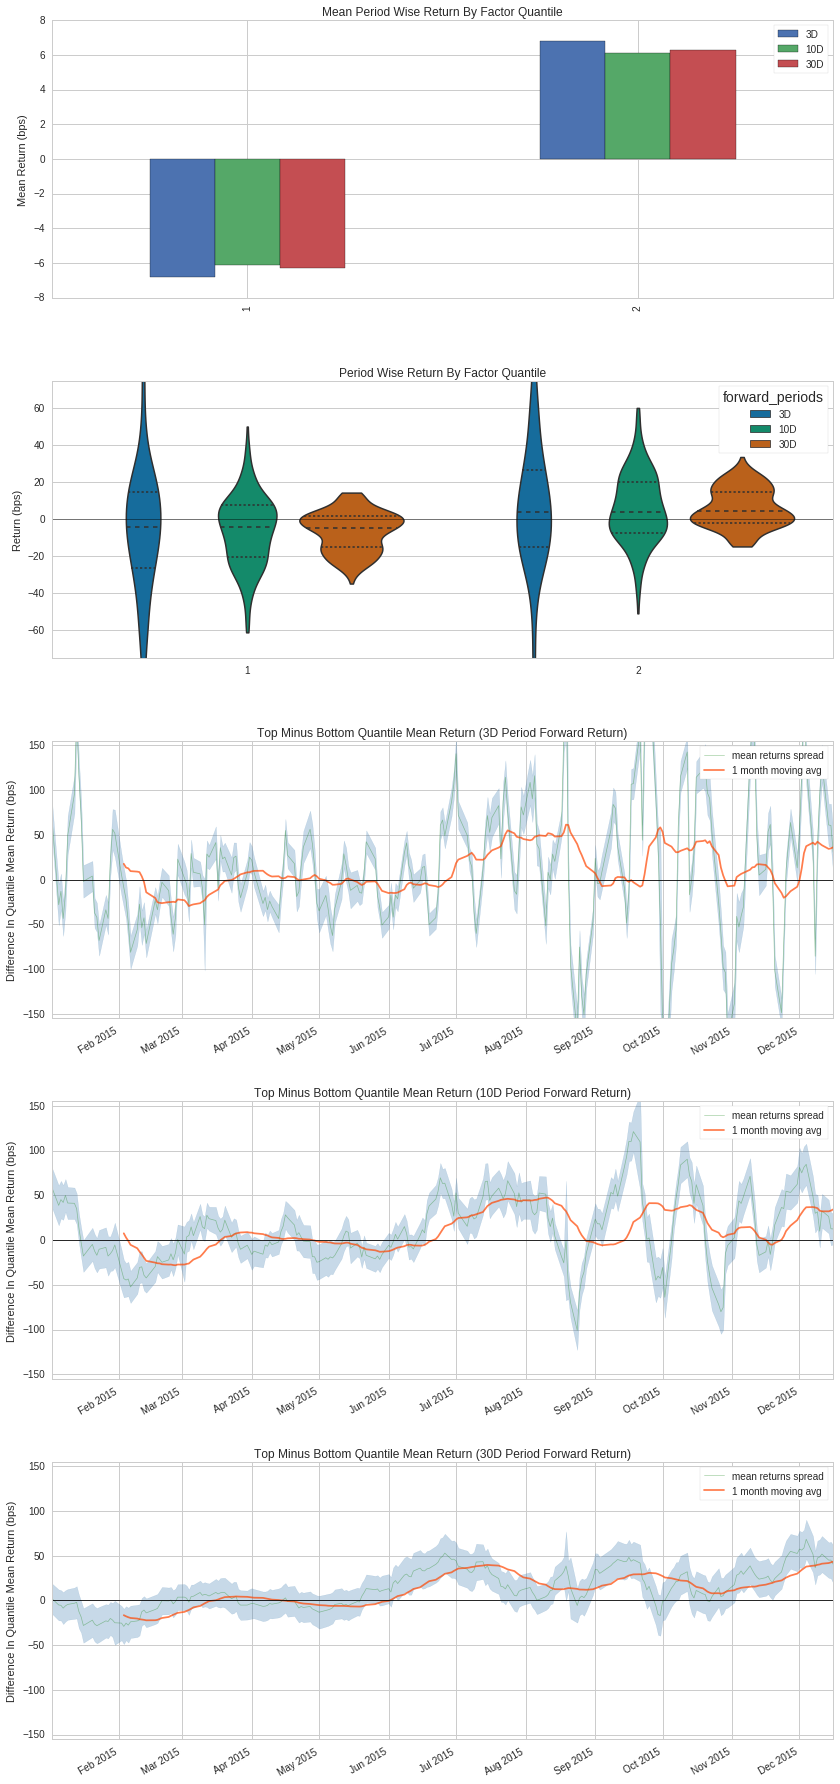

Information Analysis


,3D,10D,30D
IC Mean,0.025,0.036,0.066
IC Std.,0.116,0.112,0.104
Risk-Adjusted IC,0.219,0.325,0.633
t-stat(IC),3.413,5.056,9.854
p-value(IC),0.001,0.000,0.000
IC Skew,0.121,-0.034,0.043
IC Kurtosis,-0.226,-0.379,-1.004


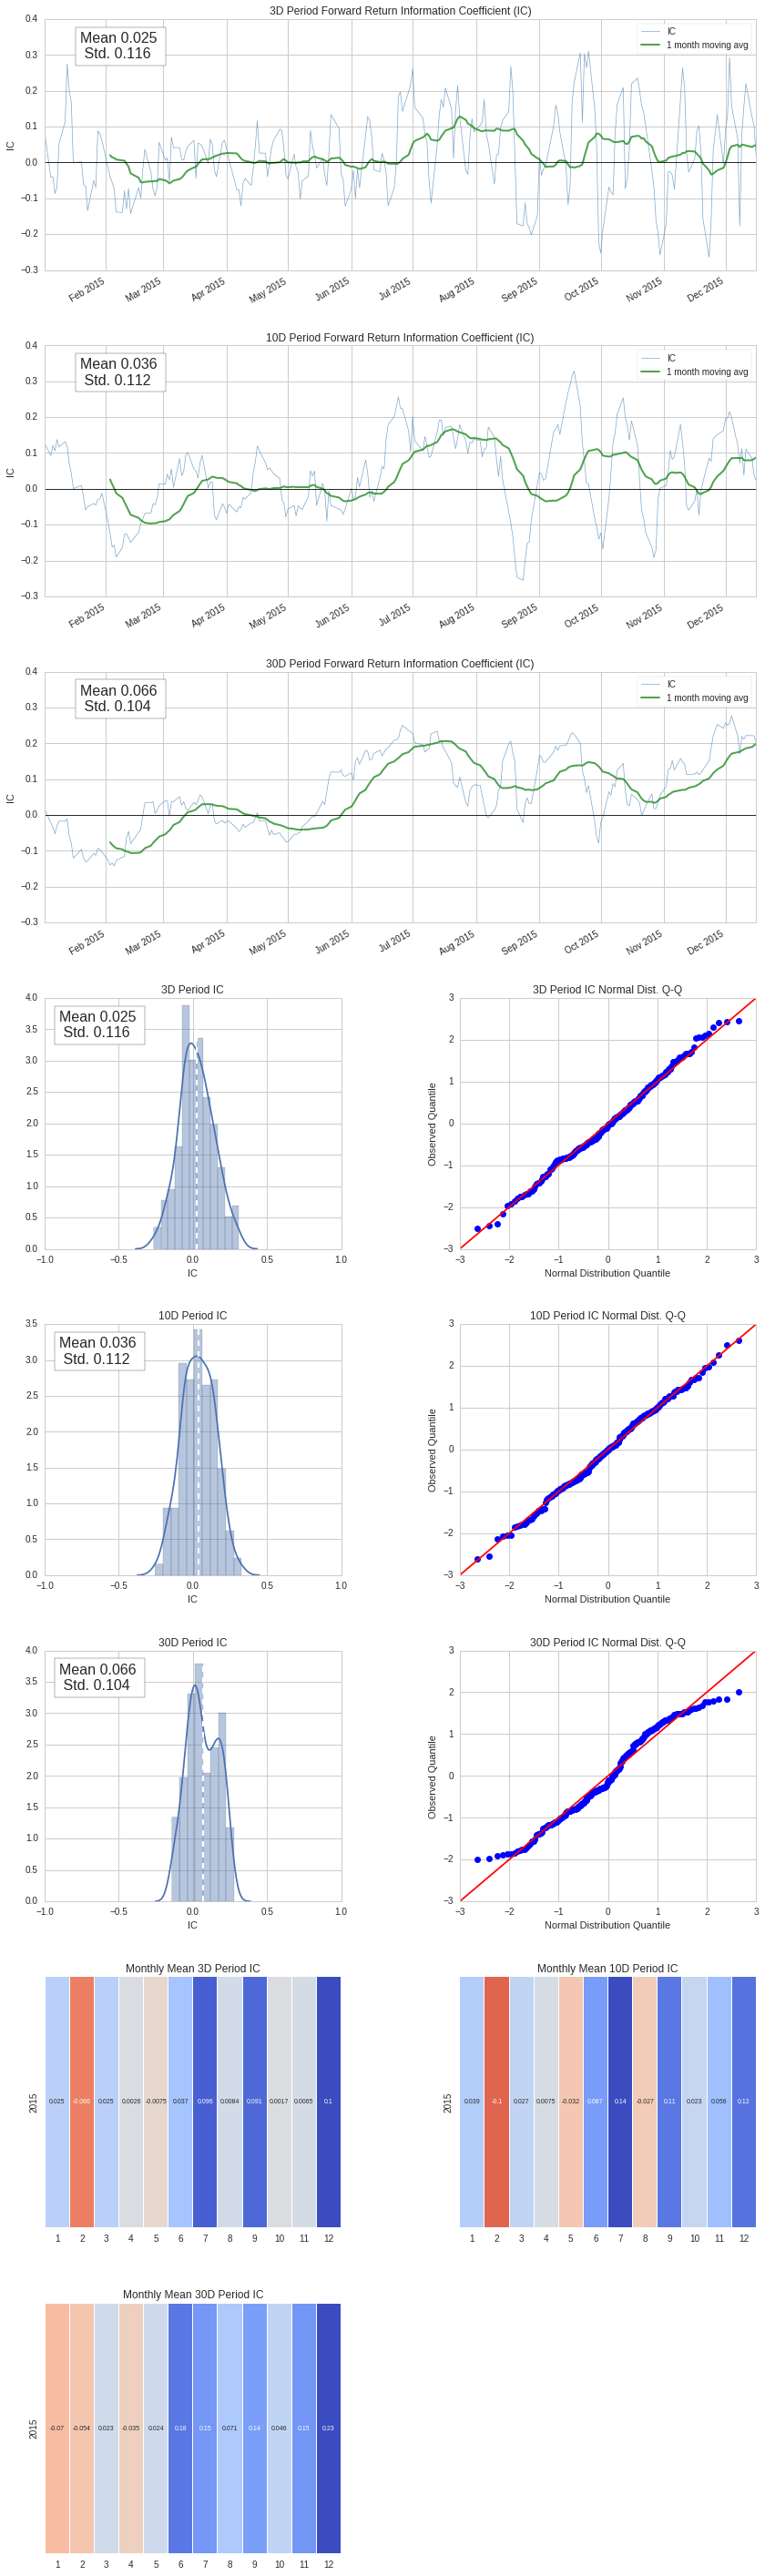

Turnover Analysis


,3D,10D,30D
Quantile 1 Mean Turnover,0.015,0.044,0.121
Quantile 2 Mean Turnover,0.014,0.041,0.112


,3D,10D,30D
Mean Factor Rank Autocorrelation,0.988,0.958,0.868


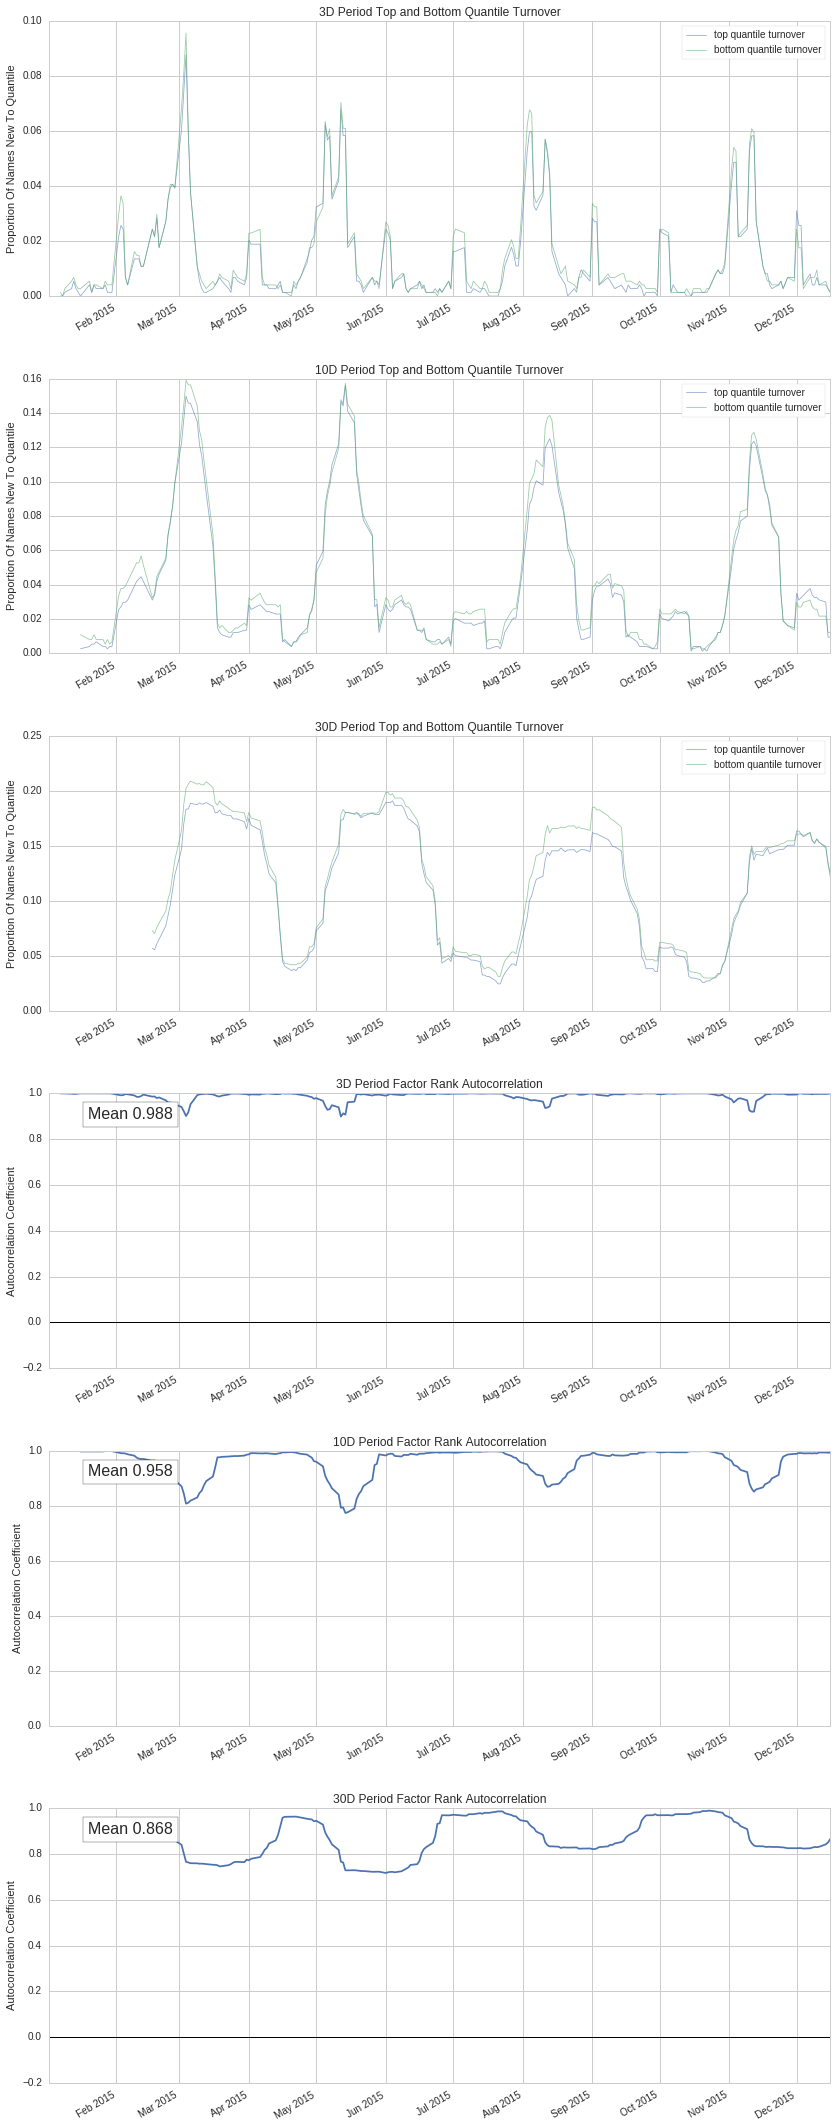

In [14]:
import alphalens

factor_data = alphalens.utils.get_clean_factor_and_forward_returns(factor = result['testing_factor'],
                                                                   prices = pricing,
                                                                   quantiles = 2,
                                                                   periods = (3,10,30))

alphalens.tears.create_full_tear_sheet(factor_data)

